# Recipe Site Traffic





The DataFrame has 947 rows and 8 columns.I made sure to validate all variables and carried out exploratory   as well statistical Analysis on the data.

The "calories," "carbohydrates," "sugar," and "protein" columns have 895 non-null values, indicating that there are 52 missing values in these columns.
To address this, I filled the null values with the mean depending on the category of the recipe and servings column.
The "high-traffic" column has 574 non-null values, suggesting that there are 373 missing values in this column.

Furthermore, I went forth to make the following modifications:
1. Replaced "Chicken Breast" from the "category" column with "Chicken."
2. Checked the value counts of the "servings" column and found that there were only 2 unique values: "4 as a snack" and "6 as a snack." I renamed these to "4" and "6," respectively, and converted the column to a numerical data type for simplicity.
3. The "high_traffic" column had only two unique values: "High" and "nan." I dropped the "nan" values and replaced them with "low."
4. Prior to training the model, I converted the "category" column to a dummy variable, leading to the creation or addition of new columns such as "category_Beverages," "category_Breakfast," "category_Chicken," "category_Dessert," "category_Lunch/Snacks," "category_Meat," "category_One_Dish_Meal," "category_Pork," "category_Potato," and "category_Vegetable."

# 1. Data Validation

In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [63]:
df = pd.read_csv('recipe_site_traffic_2212.csv')

In [64]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [66]:
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [67]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [68]:
df[df['calories'].isna()].pivot_table(index =['high_traffic','category'], values = 'recipe', aggfunc = 'count')

recipe
high_traffic category              
High         Chicken              2
             Chicken Breast       2
             Dessert              5
             Lunch/Snacks         5
             Meat                 3
             One Dish Meal        1
             Pork                11
             Potato               5
             Vegetable            5

It kinds of make sense that the recipes in the same category with the same number of servings tends to have similar nutritions. 
- I went forth to fill the null values with the mean depending on the category of the recipe and the servings as shown in the code below.

In [69]:
ls = ['calories', 'carbohydrate', 'sugar', 'protein']
df2 = df.copy()
for name in ls: 
    df2[name] = df2[name].fillna(df.groupby(["category","servings"])[name].transform('mean'))
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


Looking at the results gotten above, we realise the following;
- The Dataframe has 947 rows and 8 columns
- The calories, carbohydrates,sugar and protein columns have 895 non-null values indicating that there are 52 missing values in these columns.
- The high-traffic column has 574 non-null values, suggesting that there are 373 missing values in this column.

In [70]:
unique_values = {}
for col in ['category','servings','high_traffic']:
    unique_values[col] = df2[col].unique()
unique_values


{'category': array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
        'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
        'Dessert'], dtype=object),
 'servings': array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object),
 'high_traffic': array(['High', nan], dtype=object)}

From the results obtained above, I went forth to do the following modifications:
- Replaced 'Chicken Breast' from the category column with 'Chicken'
- Checked the value counts of the servings column and realised that there were only 2 '4 as a snack' and 1 '6 as a snack' unique values in the servings column and as result, I went forth to renaming it as '4' and '6' and converting it to a numerical data type for simplicity.
-  Furthermore, the high_traffic column has just 'High' and 'nan' as unique values. SO I went forth to drop the nan value and replacing it with 'low'

In [71]:
df2['category'] = df2['category'].replace('Chicken Breast','Chicken')

In [72]:
df2['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [73]:
replace_servings = {
    '4 as a snack' : '4',
    '6 as a snack' :'6'
}
df2['servings'] = df2['servings'].replace(replace_servings)

In [74]:
# Converting Servings column to numerical
df2['servings'] =df2['servings'].astype('int64')

In [75]:
df2['high_traffic'].dropna(inplace=True)
df2['high_traffic'].fillna('Low', inplace=True)

In [76]:
#  Dropping missing values in the dataset
df2.dropna(inplace = True)

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int64  
 7   high_traffic  947 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 59.3+ KB


In [78]:
# Checking for duplicates in the dataset
df2.duplicated().values.any()

False

As seen, there are no duplicates present in the dataset.

In [79]:
df2.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,764.641333,20.072,7.013333,66.528,Pork,6,High
1,2,35.480000,38.560,0.660000,0.920,Potato,4,High
2,3,914.280000,42.680,3.090000,2.880,Breakfast,1,Low
3,4,97.030000,30.560,38.630000,0.020,Beverages,4,High
4,5,27.050000,1.850,0.800000,0.530,Beverages,4,Low


Since the recipe column is nothing but an id and is not necessarily useful for exploratory data analysis, I went further to drop it

In [80]:
df2.drop('recipe', axis=1, inplace = True)

In [81]:
clean_df = df2.copy()

In [82]:
clean_df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,764.641333,20.072,7.013333,66.528,Pork,6,High
1,35.480000,38.560,0.660000,0.920,Potato,4,High
2,914.280000,42.680,3.090000,2.880,Breakfast,1,Low
3,97.030000,30.560,38.630000,0.020,Beverages,4,High
4,27.050000,1.850,0.800000,0.530,Beverages,4,Low


In [83]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      947 non-null    float64
 1   carbohydrate  947 non-null    float64
 2   sugar         947 non-null    float64
 3   protein       947 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    int64  
 6   high_traffic  947 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 51.9+ KB


# 2. Exploratory Data Analysis

From here, I now went forth to view the relationship between each features and the target variable and the relationship or correlation betwen features.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Pork'),
  Text(1, 0, 'Potato'),
  Text(2, 0, 'Breakfast'),
  Text(3, 0, 'Beverages'),
  Text(4, 0, 'One Dish Meal'),
  Text(5, 0, 'Chicken'),
  Text(6, 0, 'Lunch/Snacks'),
  Text(7, 0, 'Vegetable'),
  Text(8, 0, 'Meat'),
  Text(9, 0, 'Dessert')])

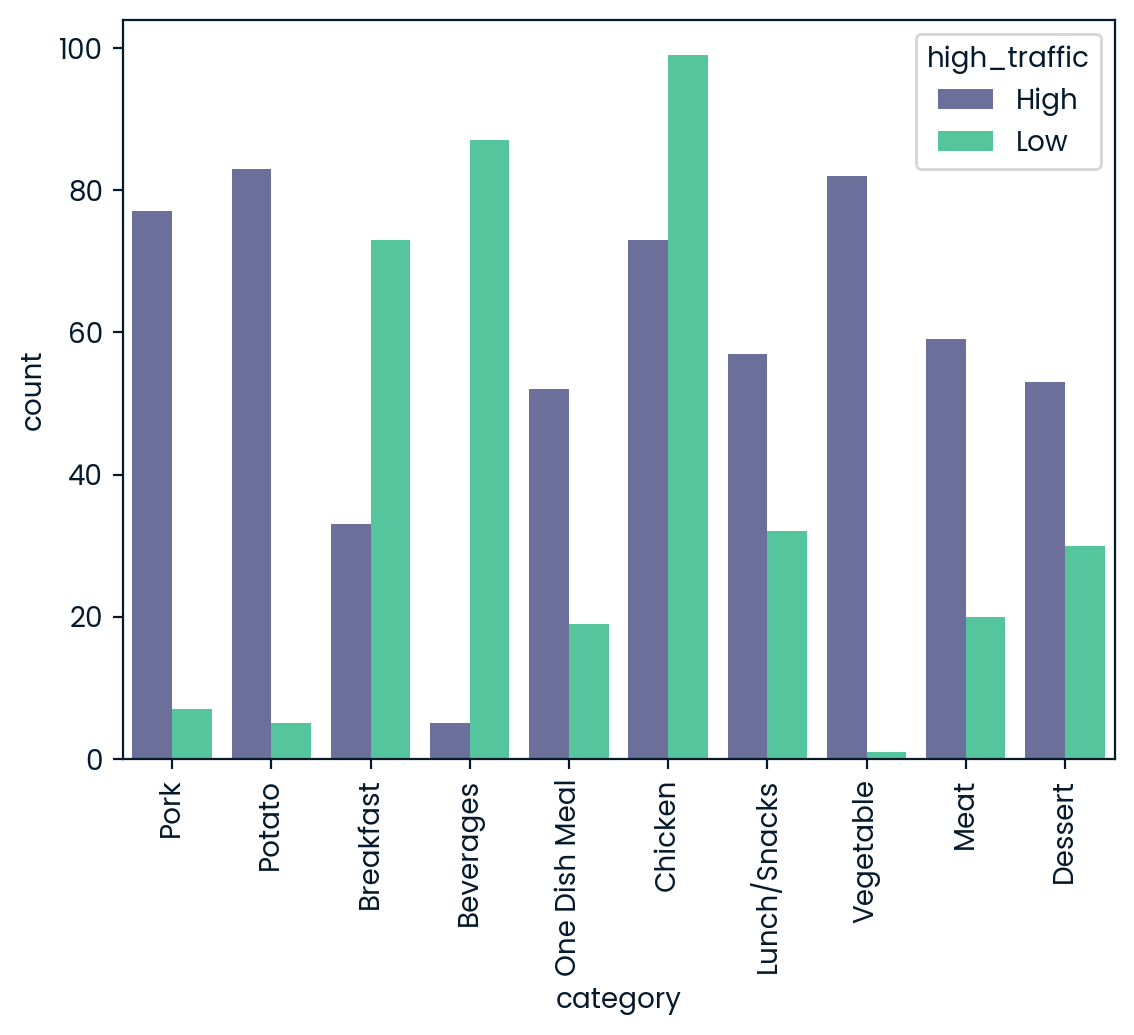

In [84]:
sns.countplot(data = clean_df, x='category', hue = 'high_traffic')
plt.xticks(rotation = 90)

From the above chart, we can see that the 'High' category has significantly higher values than the 'Low' category across most of the recipe categories (x-axis). As seen, categories such as;Potato,One Dish Meal, Lunch/Snacks,Pork,Vegetable,Meat and Dessert are associated with higher traffic hence are more likely to attract higher levels of traffic in the platform while others tend to have lower traffic. In a nutshell, the chart provides a clear overview of the relative frequency or count of 'High' and 'Low' traffic recipes within each recipe category.

<AxesSubplot: xlabel='servings', ylabel='count'>

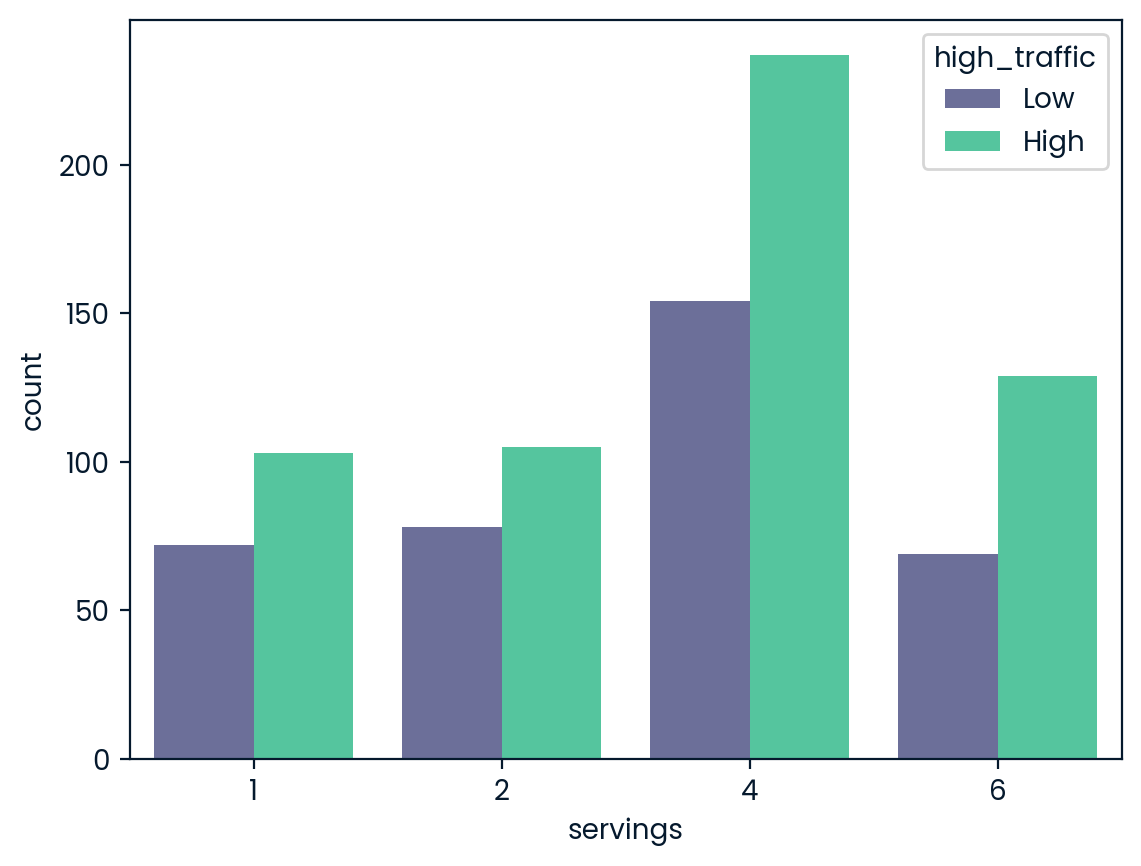

In [85]:
sns.countplot(data = clean_df, x='servings', hue = 'high_traffic')

The countplot provides a clear visualization of the distribution of 'high_traffic' recipes across different 'servings' values.
- Across all servings values, the 'High' traffic consistently has a higher count than the 'Low' traffic suggesting that there are some recipes present in each of these servings that is associated with high traffic.
- However, the most striking servings value with an extremely high count of 'High' traffic recipes is servings value 4 which implies that recipes with 4 servings are the most successful in driving high traffic on the platform.

<AxesSubplot: xlabel='high_traffic', ylabel='count'>

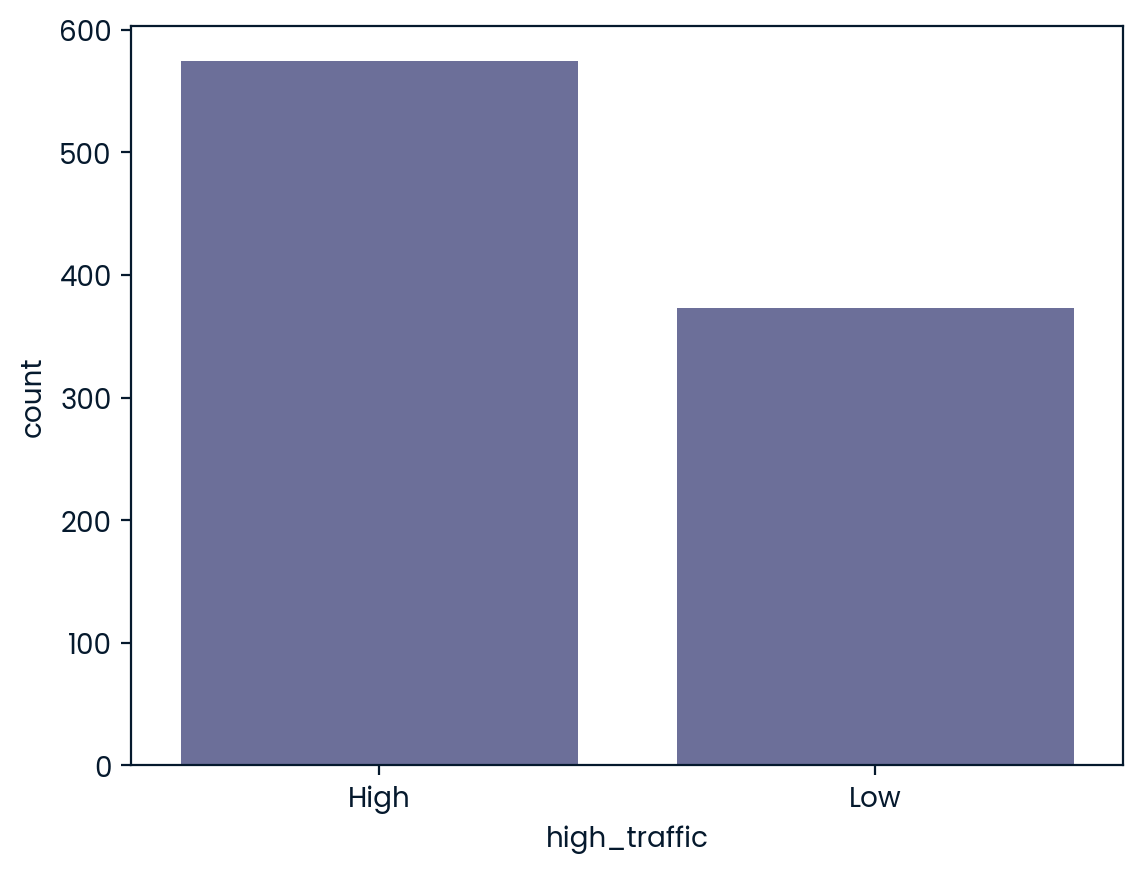

In [86]:
sns.countplot(data = clean_df, x='high_traffic')

# Numerical Features

array([[<AxesSubplot: title={'center': 'calories'}>,
        <AxesSubplot: title={'center': 'carbohydrate'}>],
       [<AxesSubplot: title={'center': 'sugar'}>,
        <AxesSubplot: title={'center': 'protein'}>]], dtype=object)

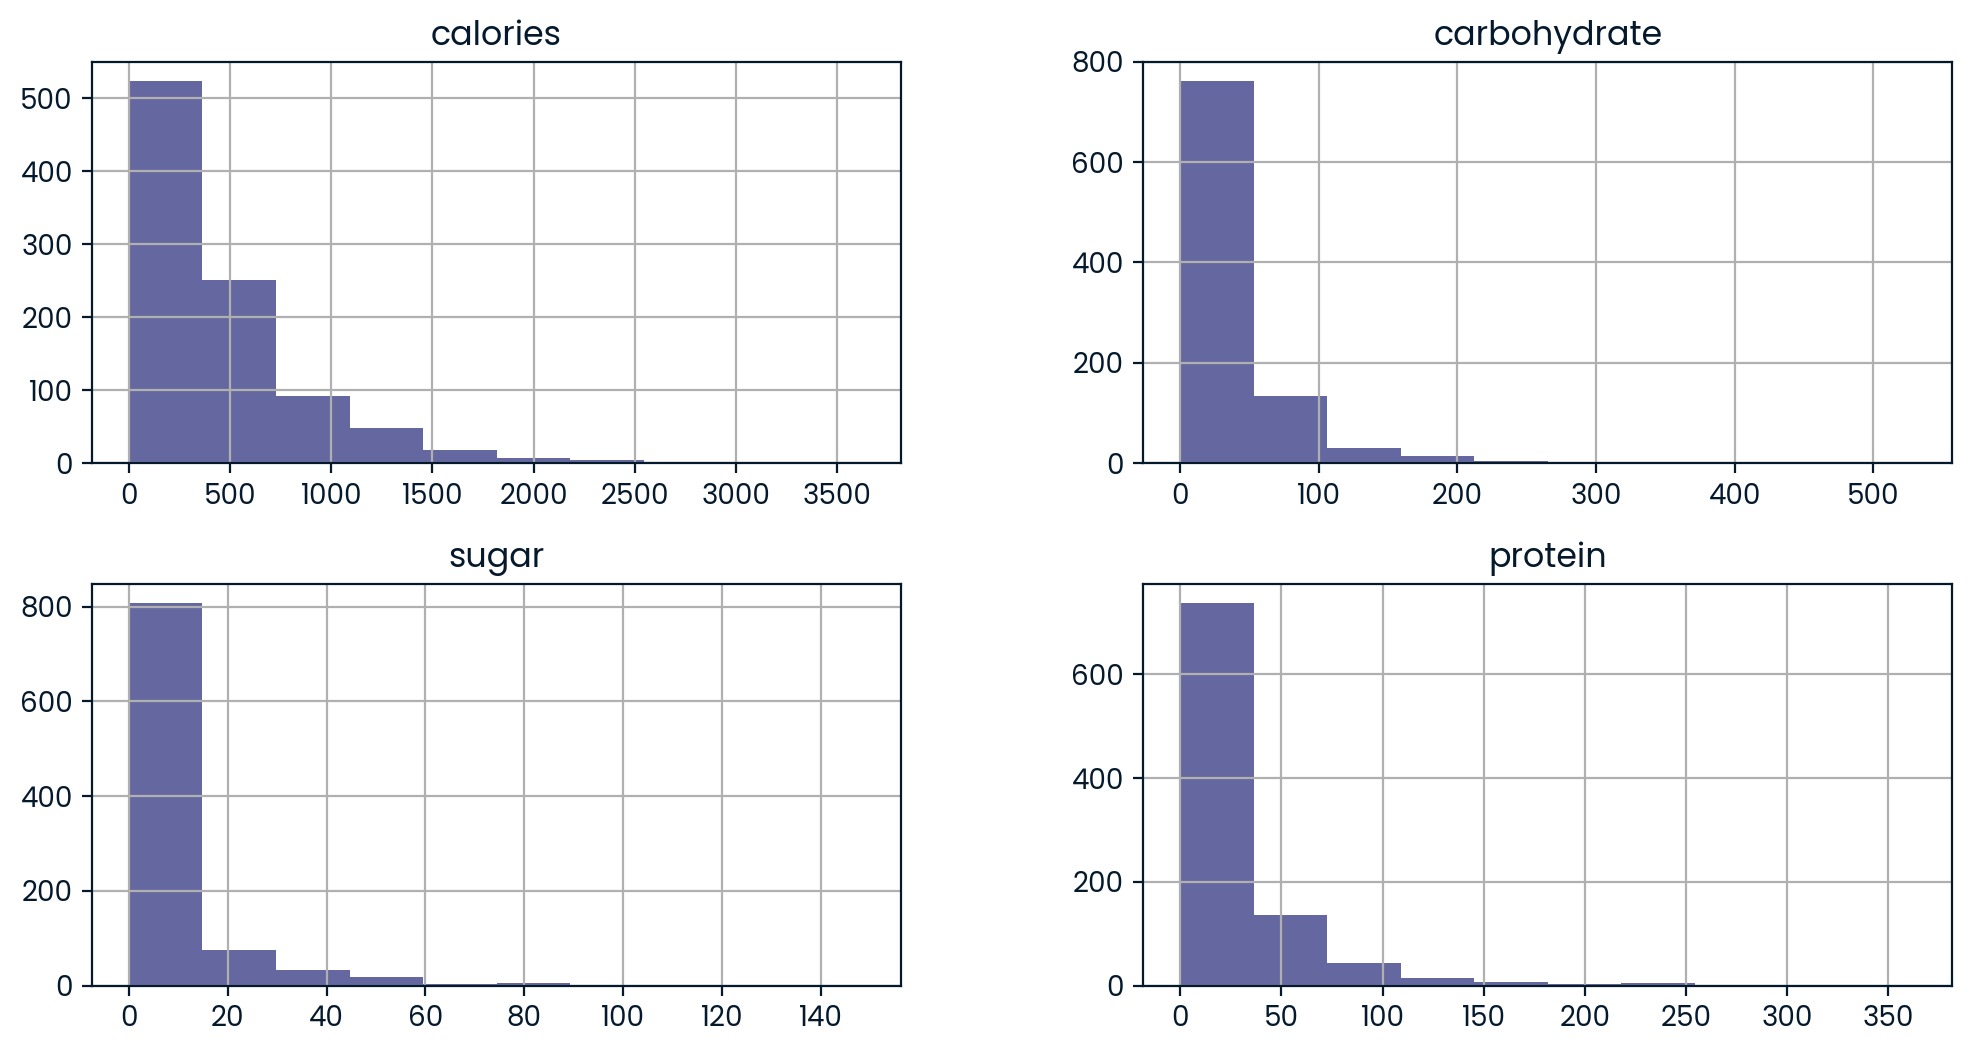

In [87]:
# Histogram for Numerical Features
clean_df[['calories', 'carbohydrate', 'sugar', 'protein']].hist(figsize = (12, 6))

Before we dive into the distribution of each, the first we realise is the fact the distribution of each feature is positively skewed.

1. Calories:
- The positively skewed calorie distribution with a clear peak around 500 calories suggests that customers generally prefer moderate calorie options. This 500-calorie range may be a sweet spot for appealing to the majority of customers and generating high traffic.

2. Carbohydrates:
- The positively skewed carbohydrate distribution with a clear peak around 100 grams indicates that customers are drawn to more carbohydrate-rich foods. This aligns with the preference for moderate calorie options, as carbohydrate-rich foods can provide a satisfying level of calories.

3. Sugar:
- The positively skewed sugar distribution with a peak around 20 grams implies that most customers prefer options with moderate sugar content. This suggests a preference for items that are not overly sweet or high in added sugars.

4. Protein:
Also we observe that there is a clear peak around the 50g mark for protein which could suggest the following:
- There is a sizable segment of customers who prefer lower-protein options, perhaps seeking a more balanced macronutrient profile or aiming for a specific dietary need.
- At the same time, the positively skewed nature of the protein distribution indicates that there is also interest in higher-protein options, though perhaps not as dominant as the preference for moderate protein.

In summary, the overall picture that emerges from these positively skewed distributions is that the target customer base generally prefers moderate, balanced nutritional profiles.

<AxesSubplot: >

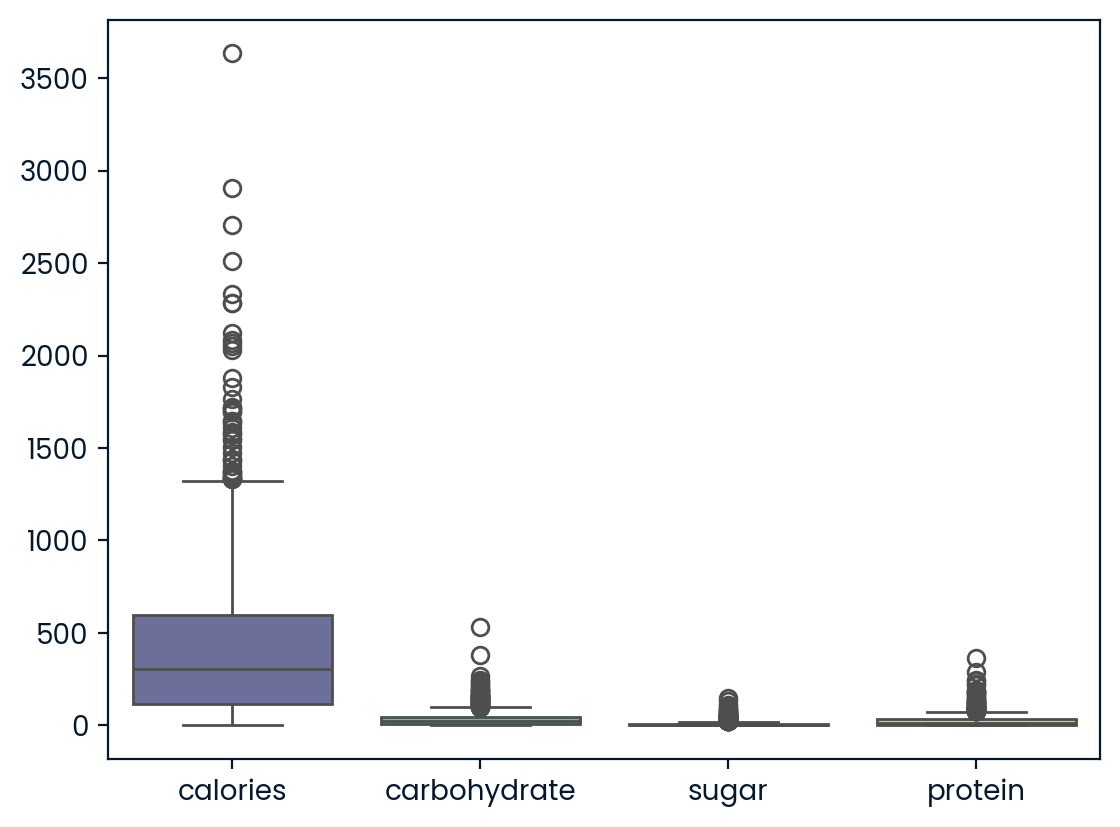

In [88]:
# Boxplot for Numerical Features
sns.boxplot(data = clean_df[['calories', 'carbohydrate', 'sugar', 'protein']])

I went forth to display the boxplot of each numerical feature, for clarity purposes.

<AxesSubplot: xlabel='calories'>

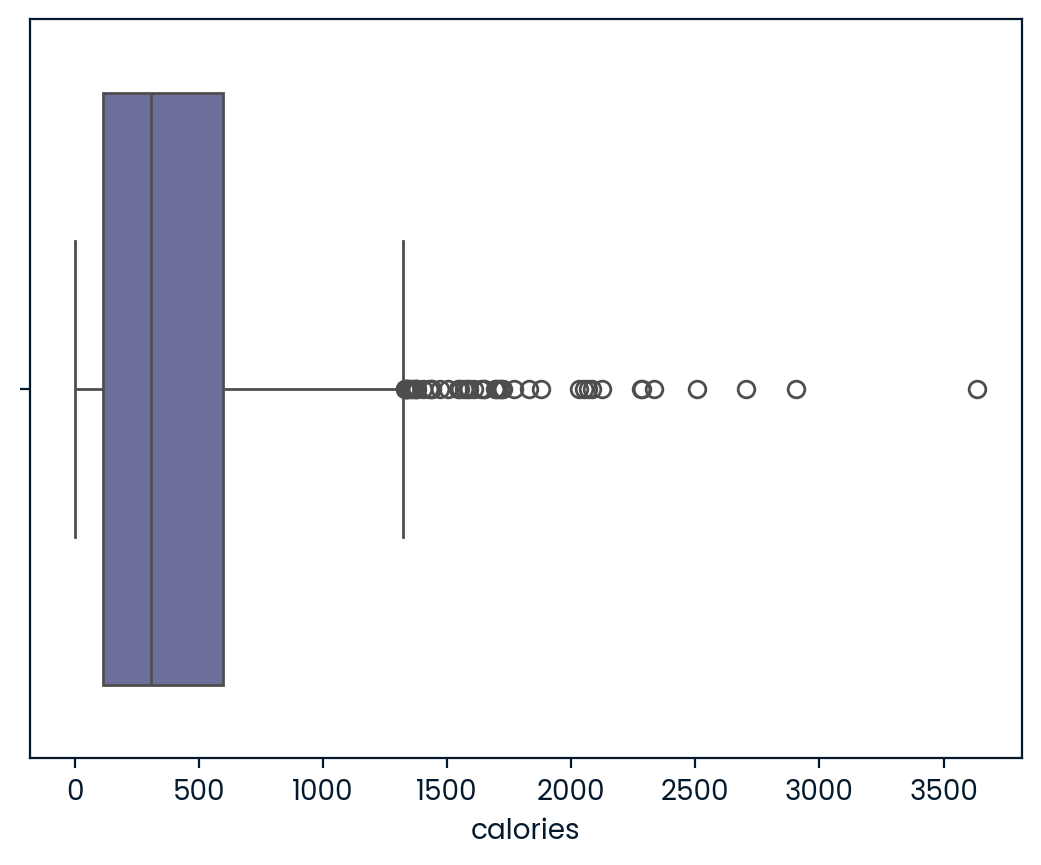

In [89]:
sns.boxplot(data=clean_df,x='calories')

<AxesSubplot: xlabel='carbohydrate'>

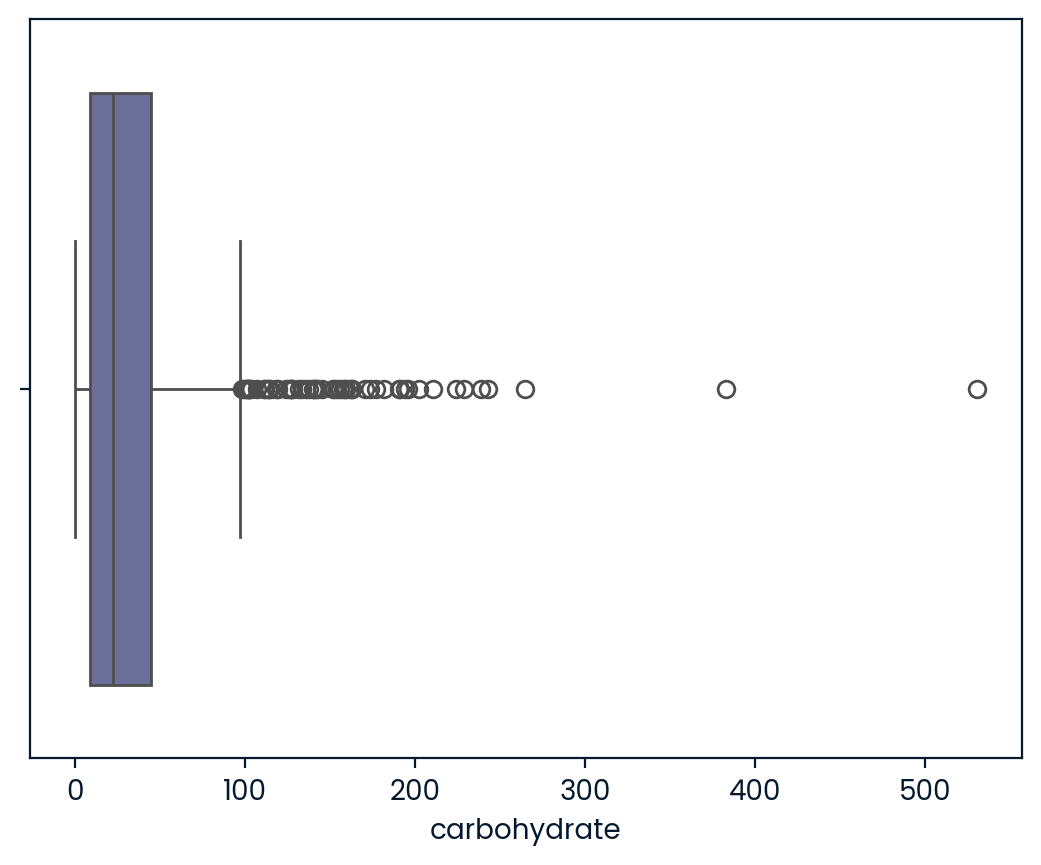

In [90]:
sns.boxplot(data=clean_df, x='carbohydrate')

<AxesSubplot: xlabel='sugar'>

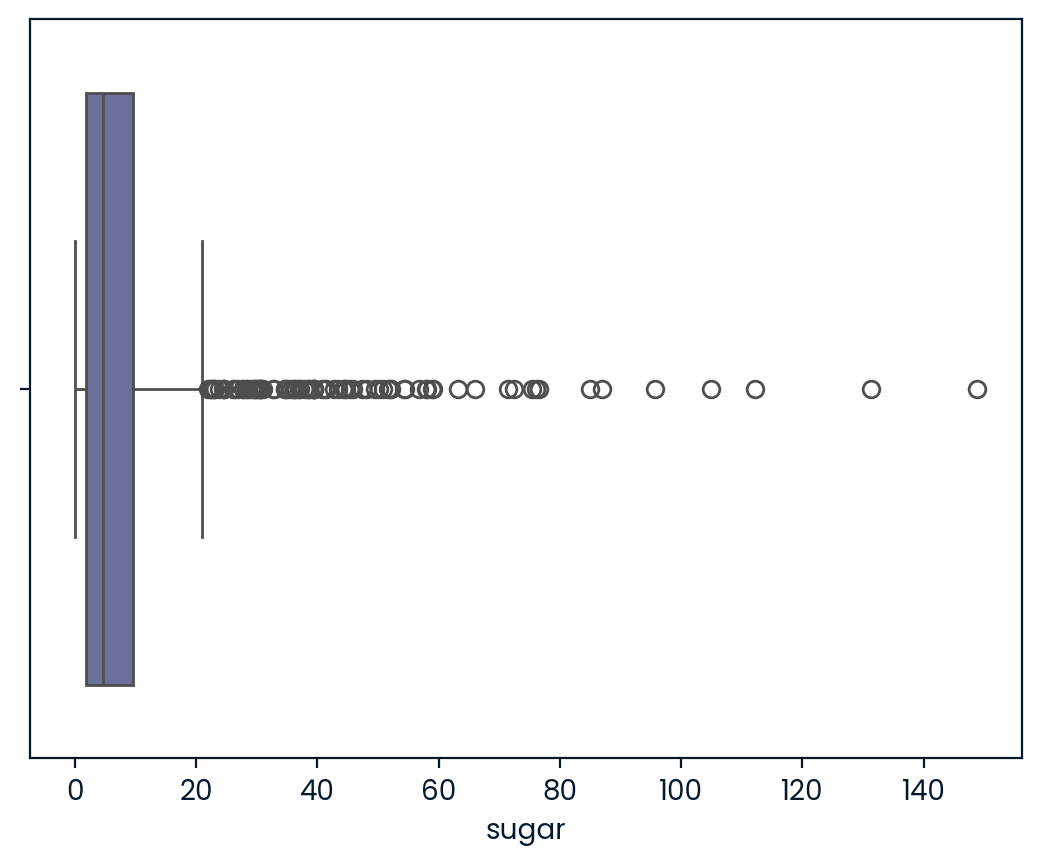

In [91]:
sns.boxplot(data= clean_df,x='sugar')

<AxesSubplot: xlabel='protein'>

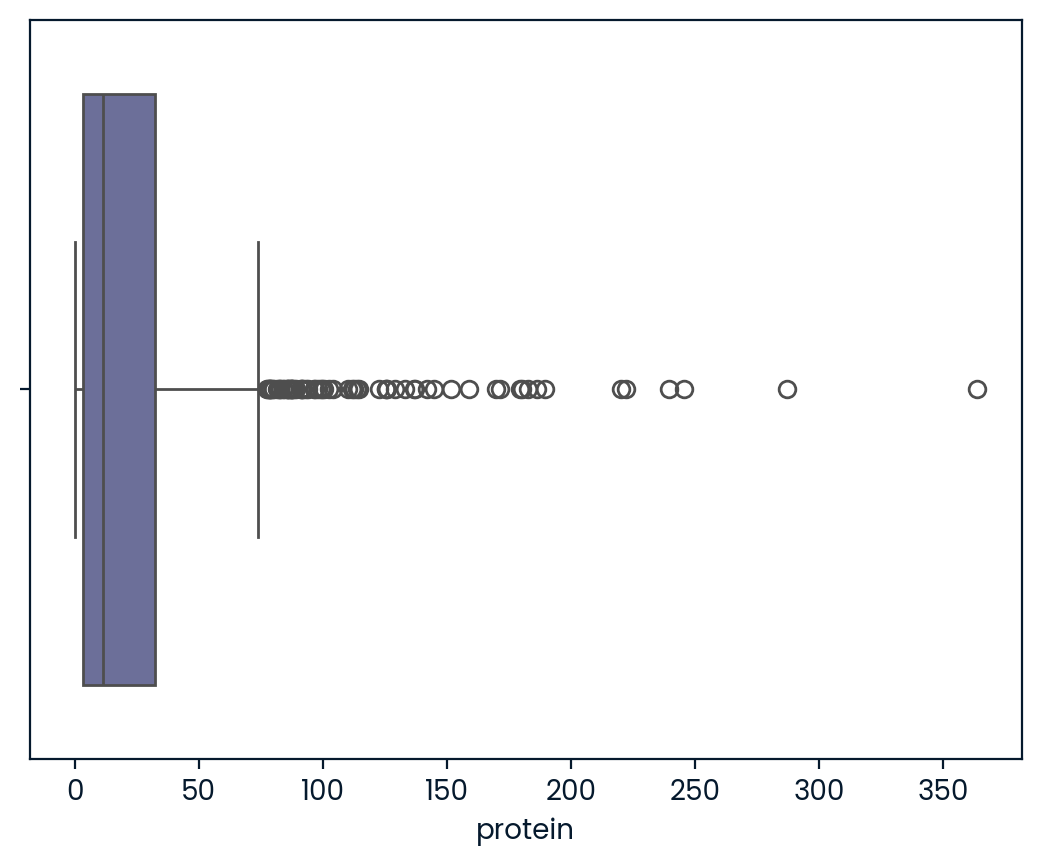

In [92]:
sns.boxplot(data=clean_df, x='protein')

As seen on the boxplot of each feature, we can clearly see the presence of outliers which suggests that there may be some unusual values of each feature in our dataset.Also, the boxplot appears to be slightlt skewed towards the lower values, indicating a positive skew for our numerical feature.So upon chosen our model, the presence of outliers in our data was taken into consideration too.

Text(0, 0.5, 'Proportion')

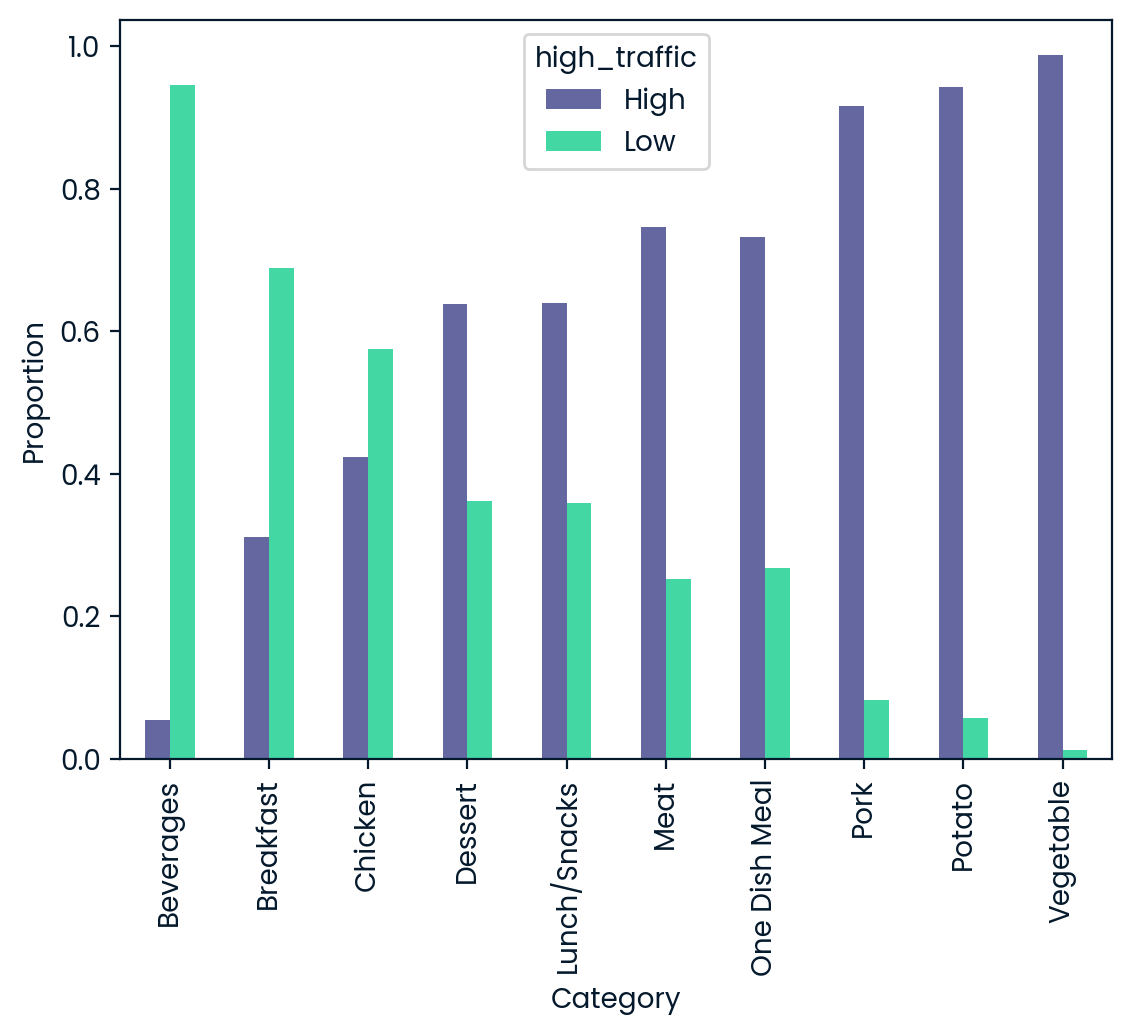

In [93]:
# Barplot of categorical features with the target variable
clean_df.groupby('category')['high_traffic'].value_counts(normalize = True).unstack().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Proportion')

- As seen, food categories such as; vegetable, potato,pork,One Dish Meal, Meat,Lunch/Snacks, Dessert tend to generate high traffic which suggests that these type of foods are more in demand.

- The traffic patterns as observed as well tend to reveal insights about user's preference. Forinstance; the high traffic for Lunch/Snacks and lower traffic for Breakfast may suggests that users are more interested in mid-day or snack-like food options than breakfast items.

In [94]:
#  Correlation matrix
corr_matrix = clean_df[['calories', 'carbohydrate', 'sugar', 'protein']].corr()

<AxesSubplot: >

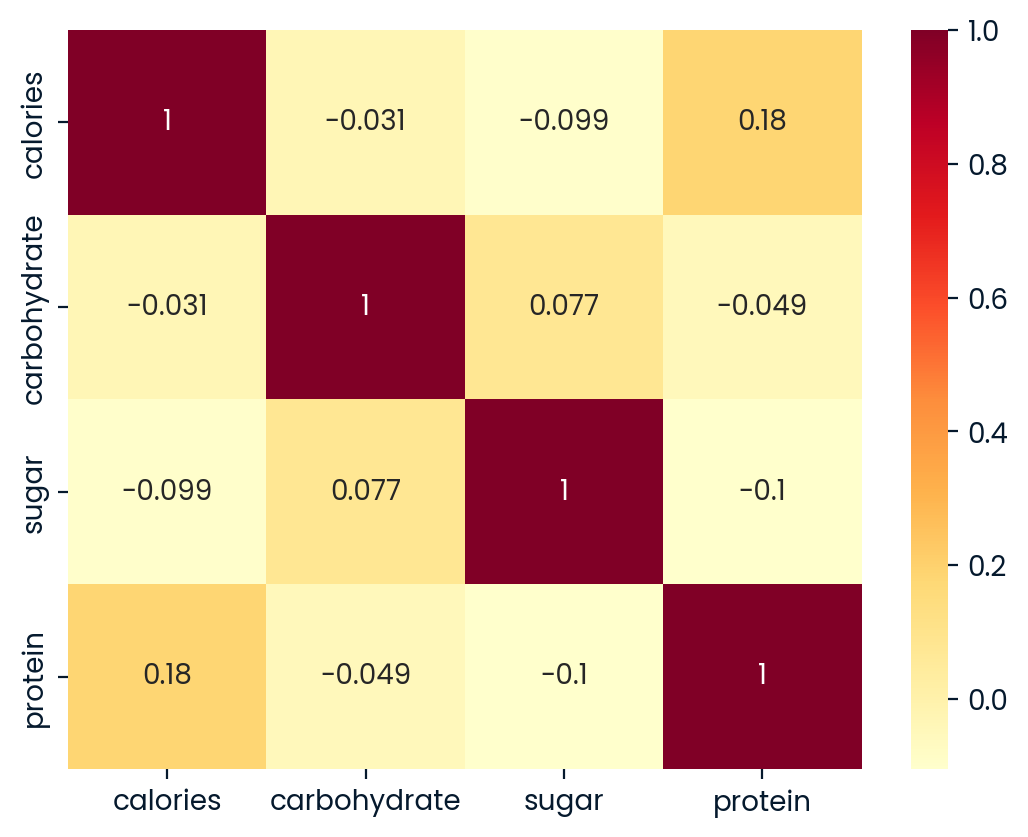

In [95]:
sns.heatmap(corr_matrix, annot = True, cmap='YlOrRd')

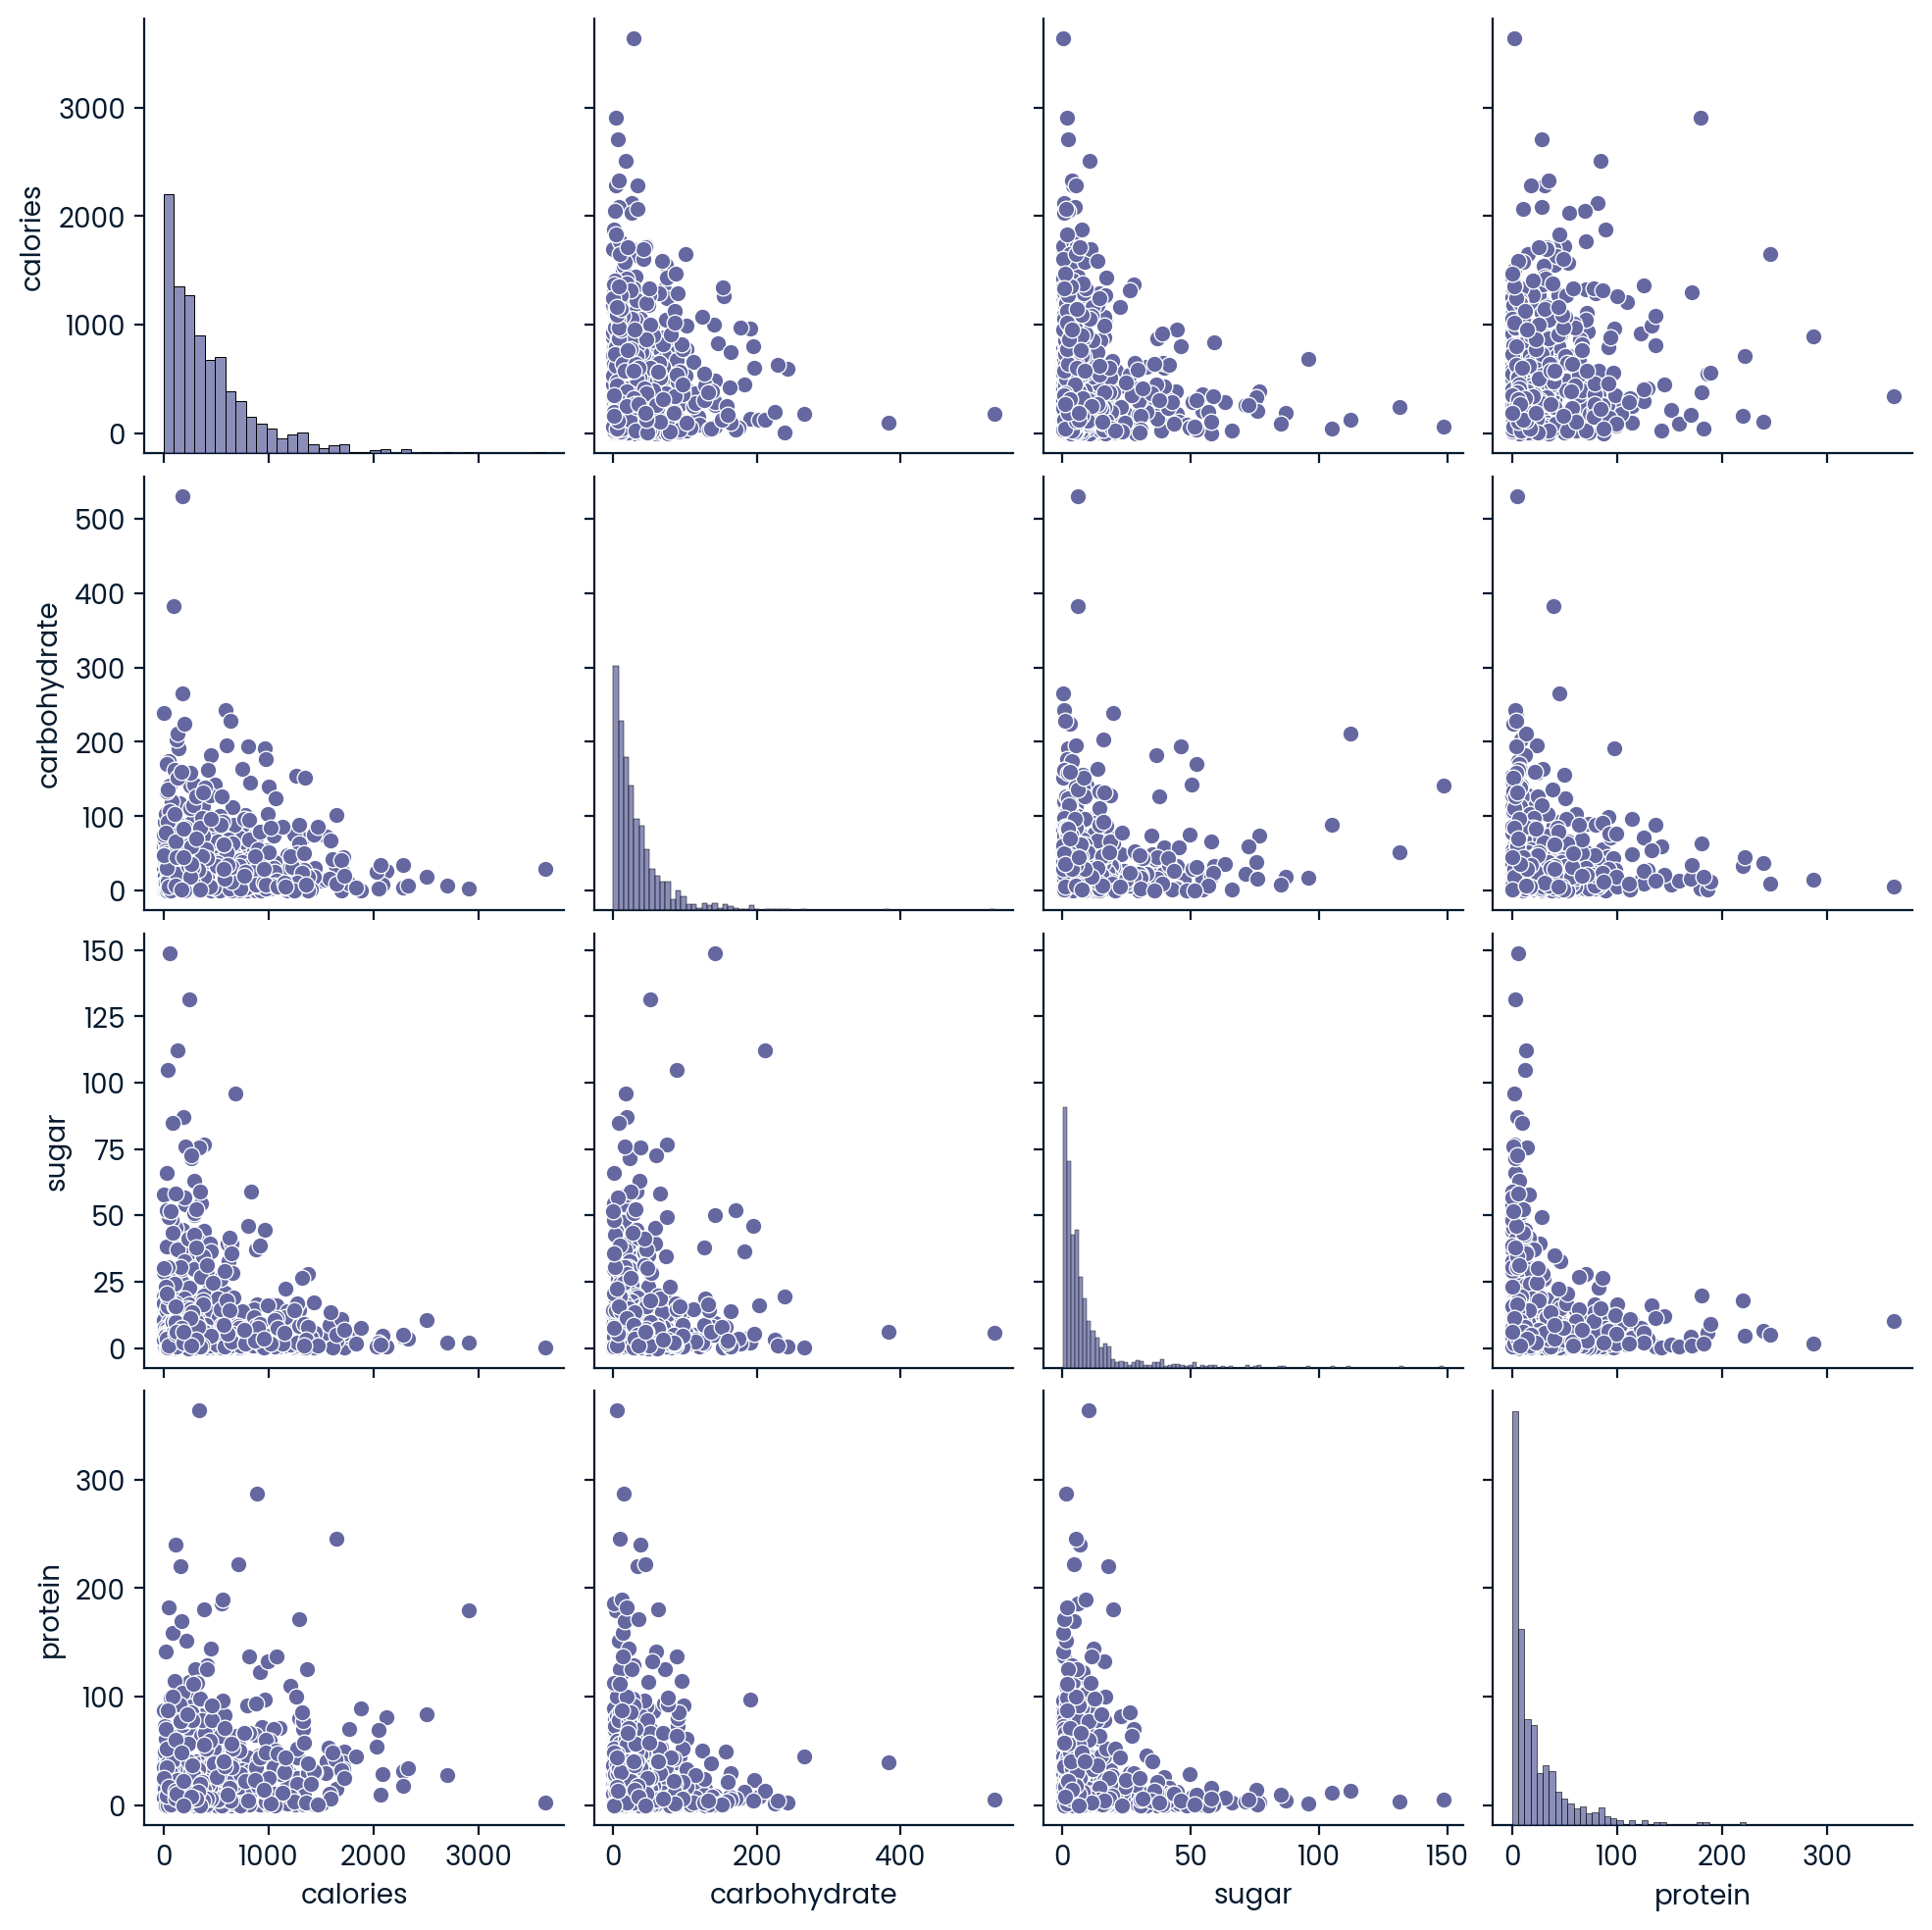

In [96]:
sns.pairplot(clean_df[['calories', 'carbohydrate', 'sugar', 'protein']])

Based on observations from our heatmap and pairplot, we can see that there is relatively weak correlation between features.As seen on the hestmap for example, the highest correlation coefficient is 0.18 for the relationship between calories and protein which further goes on to imply that there is actually no strong linear relationship between any of the  other features as shown as well on the scatterplot.

# 3. Statistical Analysis
Here, I carried out a t-test to compare the mean calories between high and low traffic recipes and a Chi-square test on category and servings columns.
- The t-test is a parametric statistical test that is used to determine if the means of two groups are statiscally different from each other and is based on the assumption that, the data follows a normal distribution. So,in order for these assumptions to be met, I went forth to normalize the features.
- The chi-square test on the other hand is a non-parametric statistical test used to determine if there is a significant relationship between two categorical variables.

In [97]:
# T-test to compare the mean calories between high and low traffic recipes

num_feats = clean_df[['calories', 'carbohydrate', 'sugar', 'protein','high_traffic']]
num_feats['calories'] = np.log1p(num_feats['calories'])
num_feats['carbohydrate'] = np.log1p(num_feats['carbohydrate'])
num_feats['sugar'] = np.log1p(num_feats['sugar'])
num_feats['protein'] = np.log1p(num_feats['protein'])
high_traffic_val =num_feats[num_feats['high_traffic'] == 'High']
low_traffic_val = num_feats[num_feats['high_traffic'] == 'Low']
for col in ['calories', 'carbohydrate', 'sugar', 'protein']:
    t_stat,p_value = stats.ttest_ind(high_traffic_val[col],low_traffic_val[col])
    print(f"T-test for {col}: t-static = {t_stat:.2f}, p-value = {p_value: .4f}")

T-test for calories: t-static = 2.08, p-value =  0.0382
T-test for carbohydrate: t-static = 2.00, p-value =  0.0457
T-test for sugar: t-static = -2.02, p-value =  0.0434
T-test for protein: t-static = 4.06, p-value =  0.0001


The p-value is the probability of observing the given test statistic under the null hypothesis, which typically assumes that there is no significant difference between the means whereas the t-test statistic is the test statistic calculated from the sample data that is used to determine the statistical significance of the difference between the means of the two groups. A higher absolute value of the t-statistic indicates a stronger evidence against the null-hypothesis. Further explanation of the results gotten above is described below:

1. Calories: The t-statistic for carbohydrates is 2.08 with a p-value of 0.0382 indicating that there is a statistically significant difference in the mean calorie content between the two groups being compared i.e. the high_traffic vs. the low_traffic categories.The p-value of 0.0382 is less than the commonly used significance level of 0.05, suggesting that the difference in mean calorie content is umlikely to have occured by chance.



2. Carbohydrates: The t-statistic for carbohydrates is 2.00 with a p-value of 0.0457 indicating that there is a statistically significant difference in the mean calorie content between the two groups.The p-value of 0.0457 is slightlg below the 0.05 significance level, indicating a moderatly strong evidence of a difference in Carbohydrate content.





3. Sugar: The t-statistic for sugar is -2.02 with a p-value of 0.0434 indicating that the mean sugar content is significantly different between the two groups with one group actually having a higher mean sugar content than the other. The p-value of 0.0434 indicates a statistically significant difference in sugar content.

4. Protein: The t-statistic for protein is 4.06 with a p-value of 0.0001 indicating that there is a highly significant difference in the mean protein content between the two

groups. The p-value of 0.0001 is much lower than the significance level of 0.05,providing very strong evidence that the mean protein content differs between the groups. 

In [98]:
# Chi-square test for category, serv
contingency_table = pd.crosstab(clean_df['category'],clean_df['high_traffic'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square test: chi2 = {chi2:.2f}, p-value = {p_value:.4f}')

Chi-square test: chi2 = 318.29, p-value = 0.0000


The high significant chi-square test result indicates that there is a strong relationship between the variables being tested. Furthermore the extremely low p-value indicates that the observed differences in the frequencies or proportions of the categories are highly statistically significant.

In [99]:
# Chi-square test for category, servings, and high_traffic
contingency_table = pd.crosstab(clean_df['servings'],clean_df['high_traffic'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-square test: chi2 = {chi2:.2f}, p-value = {p_value:.4f}')

Chi-square test: chi2 = 2.74, p-value = 0.4340


The p-value of 0.4340 is much higher than the commonly used significance level of 0.05 indicating that the observed differences in the frequencies of the categories are not statistically significant meaning the distribution of the categories appears to be independent of the variables being examined.

# 4. Model Development
- In this scenario, since the target variable 'high_traffic', is a binary categorical variable, a logistic regression model was adopted and a Random Forest model adopted for comparisons.
- I also used the results from the confusion matrix and classification report from the model and went forth to check whether or not the models meet the Bias-Variance Tradeoff before drawing any conclusions.
- It is worth noting that, I used Robust scaling for my Logistic Regression Model as it is particularly useful when dealing with outliers or non-normal distributions as we previously saw in our boxplot and histogram respectively.
- Robust scaling, scales based on the median and interquartile range (IQR) rather than the mean and standard deviation. This makes it more robust to the outliers, as the median is less affected by the extreme values. It subtracts the median of the feature and then divides by the IQR, ensuring that the data is sealed proportionally while being less influenced by outliers.

In [100]:
# Importing all necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler

In [101]:
category_dummies = pd.get_dummies( clean_df['category'], prefix = 'category')

In [102]:
clean_df = pd.concat([clean_df,category_dummies], axis = 1)

In [103]:
clean_df = clean_df.drop('category',axis =1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calories                947 non-null    float64
 1   carbohydrate            947 non-null    float64
 2   sugar                   947 non-null    float64
 3   protein                 947 non-null    float64
 4   servings                947 non-null    int64  
 5   high_traffic            947 non-null    object 
 6   category_Beverages      947 non-null    uint8  
 7   category_Breakfast      947 non-null    uint8  
 8   category_Chicken        947 non-null    uint8  
 9   category_Dessert        947 non-null    uint8  
 10  category_Lunch/Snacks   947 non-null    uint8  
 11  category_Meat           947 non-null    uint8  
 12  category_One Dish Meal  947 non-null    uint8  
 13  category_Pork           947 non-null    uint8  
 14  category_Potato         947 non-null    ui

In [104]:
X = clean_df.drop('high_traffic', axis = 1)
y = clean_df['high_traffic']

# i. Logistic Regression

In [105]:
model = LogisticRegression()

In [106]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)

In the above code, I used 30% of the data for testing and 70% for training.

In [107]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [109]:
predictions = model.predict(X_test_scaled)

In [110]:
print(confusion_matrix(y_test, predictions))

[[134  42]
 [ 32  77]]


In [111]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

        High       0.81      0.76      0.78       176
         Low       0.65      0.71      0.68       109

    accuracy                           0.74       285
   macro avg       0.73      0.73      0.73       285
weighted avg       0.75      0.74      0.74       285



Based on the results obtained, the following insights can be drawn:
1. Confusion Matrix:
 The confusion matrix shows the number of true positives (134), true negatives (77), false positives (42), and false negatives (32).This indicates that the model correctly predicted 134 instances as "High" and 77 instances as "Low", while it misclassified 42 instances as "High" when they were actually "Low", and 32 instances as "Low" when they were actually "High".

2. Accuracy:
The overall accuracy of the model is 0.74, which means that the model correctly classified 74% of the test instances.

3. Precision:
The precision for the "High" class is 0.81, which means that 81% of the instances predicted as "High" were actually "High".The precision for the "Low" class is 0.65, which means that 65% of the instances predicted as "Low" were actually "Low".

4. Recall (Sensitivity):
The recall for the "High" class is 0.76, which means that the model correctly identified 76% of the actual "High" instances.The recall for the "Low" class is 0.71, which means that the model correctly identified 71% of the actual "Low" instances.

5. F1-Score:
The F1-score for the "High" class is 0.78, which is a balanced measure of precision and recall.The F1-score for the "Low" class is 0.68, indicating a slightly lower balance between precision and recall for this class.


# ii. Random Forest Classifier

Since the Random Forest Classifier is a tree based model, it does not need feature scaling.So I went forth to fit the model directly with the training and testing data.

In [112]:
rfc = RandomForestClassifier()

In [113]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [114]:
rfc_predictions = rfc.predict(X_test)

In [115]:
print(confusion_matrix(y_test,rfc_predictions))

[[132  44]
 [ 41  68]]


In [116]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

        High       0.76      0.75      0.76       176
         Low       0.61      0.62      0.62       109

    accuracy                           0.70       285
   macro avg       0.69      0.69      0.69       285
weighted avg       0.70      0.70      0.70       285



Based on the results obtained from our RFC model the following insights could be drawn:

- Confusion Matrix:
The confusion matrix shows that the model correctly predicted 136 instances as "High" and 71 instances as "Low".It also shows that the model misclassified 40 instances as "High" when they were actually "Low", and 38 instances as "Low" when they were actually "High".

Classification Report:
1. Precision:
 The precision for the "High" class is 0.78, meaning that 78% of the instances predicted as "High" were actually "High".The precision for the "Low" class is 0.64, meaning that 64% of the instances predicted as "Low" were actually "Low".

2. Recall (Sensitivity):
The recall for the "High" class is 0.77, meaning that the model correctly identified 77% of the actual "High" instances.The recall for the "Low" class is 0.65, meaning that the model correctly identified 65% of the actual "Low" instances.

3. F1-Score:
The F1-score for the "High" class is 0.78, indicating a good balance between precision and recall.
The F1-score for the "Low" class is 0.65, indicating a lower balance between precision and recall for this class.

4. Accuracy:
 The overall accuracy of the model is 0.73, meaning that the model correctly classified 73% of the test instances.



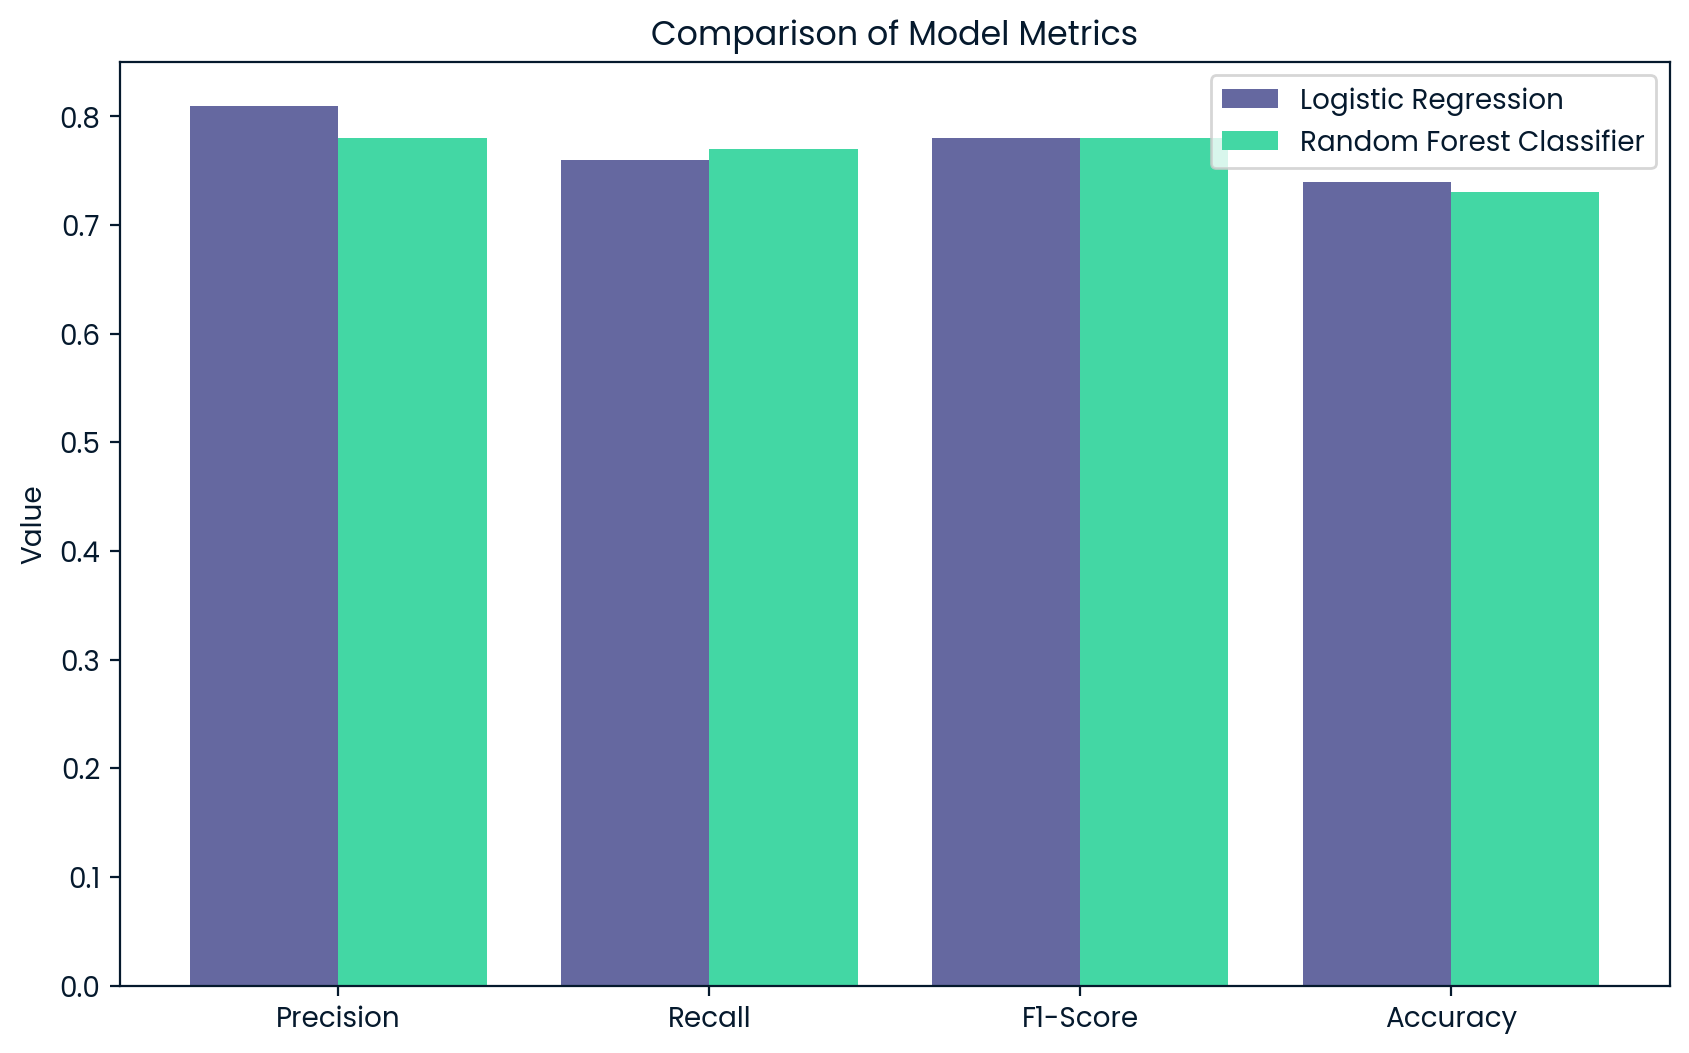

In [117]:
# Logistic Regression metrics
lr_precision_high = 0.81
lr_recall_high = 0.76
lr_f1_high = 0.78
lr_precision_low = 0.65
lr_recall_low = 0.71
lr_f1_low = 0.68
lr_accuracy = 0.74

# Random Forest Classifier metrics
rfc_precision_high = 0.78
rfc_recall_high = 0.77
rfc_f1_high = 0.78
rfc_precision_low = 0.64
rfc_recall_low = 0.65
rfc_f1_low = 0.65
rfc_accuracy = 0.73

# Create x-axis labels
labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the metrics for Logistic Regression
x = np.arange(len(labels))
lr_metrics = [lr_precision_high, lr_recall_high, lr_f1_high, lr_accuracy]
ax.bar(x - 0.2, lr_metrics, 0.4, label='Logistic Regression')

# Plot the metrics for Random Forest Classifier
rfc_metrics = [rfc_precision_high, rfc_recall_high, rfc_f1_high, rfc_accuracy]
ax.bar(x + 0.2, rfc_metrics, 0.4, label='Random Forest Classifier')

# Add labels, title, and legend
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Value')
ax.set_title('Comparison of Model Metrics')
ax.legend()


In [118]:
# Training and Test Errors for Logistic Regression Model
training_error = 1 - model.score(X_train_scaled,y_train)
test_error = 1 - model.score(X_test_scaled, y_test)
Logreg_error = pd.DataFrame(data = {'Logistic Errors':[training_error, test_error]}, index = ['Training_Error', 'Testing_Error'])

In [119]:
Logreg_error

,Logistic Errors
Training_Error,0.228097
Testing_Error,0.259649


In [120]:
# Training and Test Errors for Random Forest Classifier Model
training_error = 1 - rfc.score(X_train,y_train)
test_error = 1 - rfc.score(X_test, y_test)
rfc_error = pd.DataFrame(data = {'RFC Errors':[training_error, test_error]}, index = ['Training_Error', 'Testing_Error'])

In [121]:
rfc_error

,RFC Errors
Training_Error,0.004532
Testing_Error,0.298246


# Partial Conclusion
**We  can clearly see that both the training and testing errors for our Logistic model, are closed to each other indicating a good balance between bias and variance.However this doesn't hold true for our Random Forest Classifier model as the model tends to do well with our training data but not so well with our testing data meaning it does not generalise well with new or unseen data which is clear positive sign of high variance.Furthermore, looking at the classification and confusion matrix of both models, we realise that the Logistic Regression Model out performs our Random Forest Classifier.**

# Feature Importance


Here, I looked how much the different features contributed to the prediction or decision made by our model. It is simply a way of quantifying the relative importance of each input feature in the model's decision-making process.

<AxesSubplot: ylabel='Feature'>

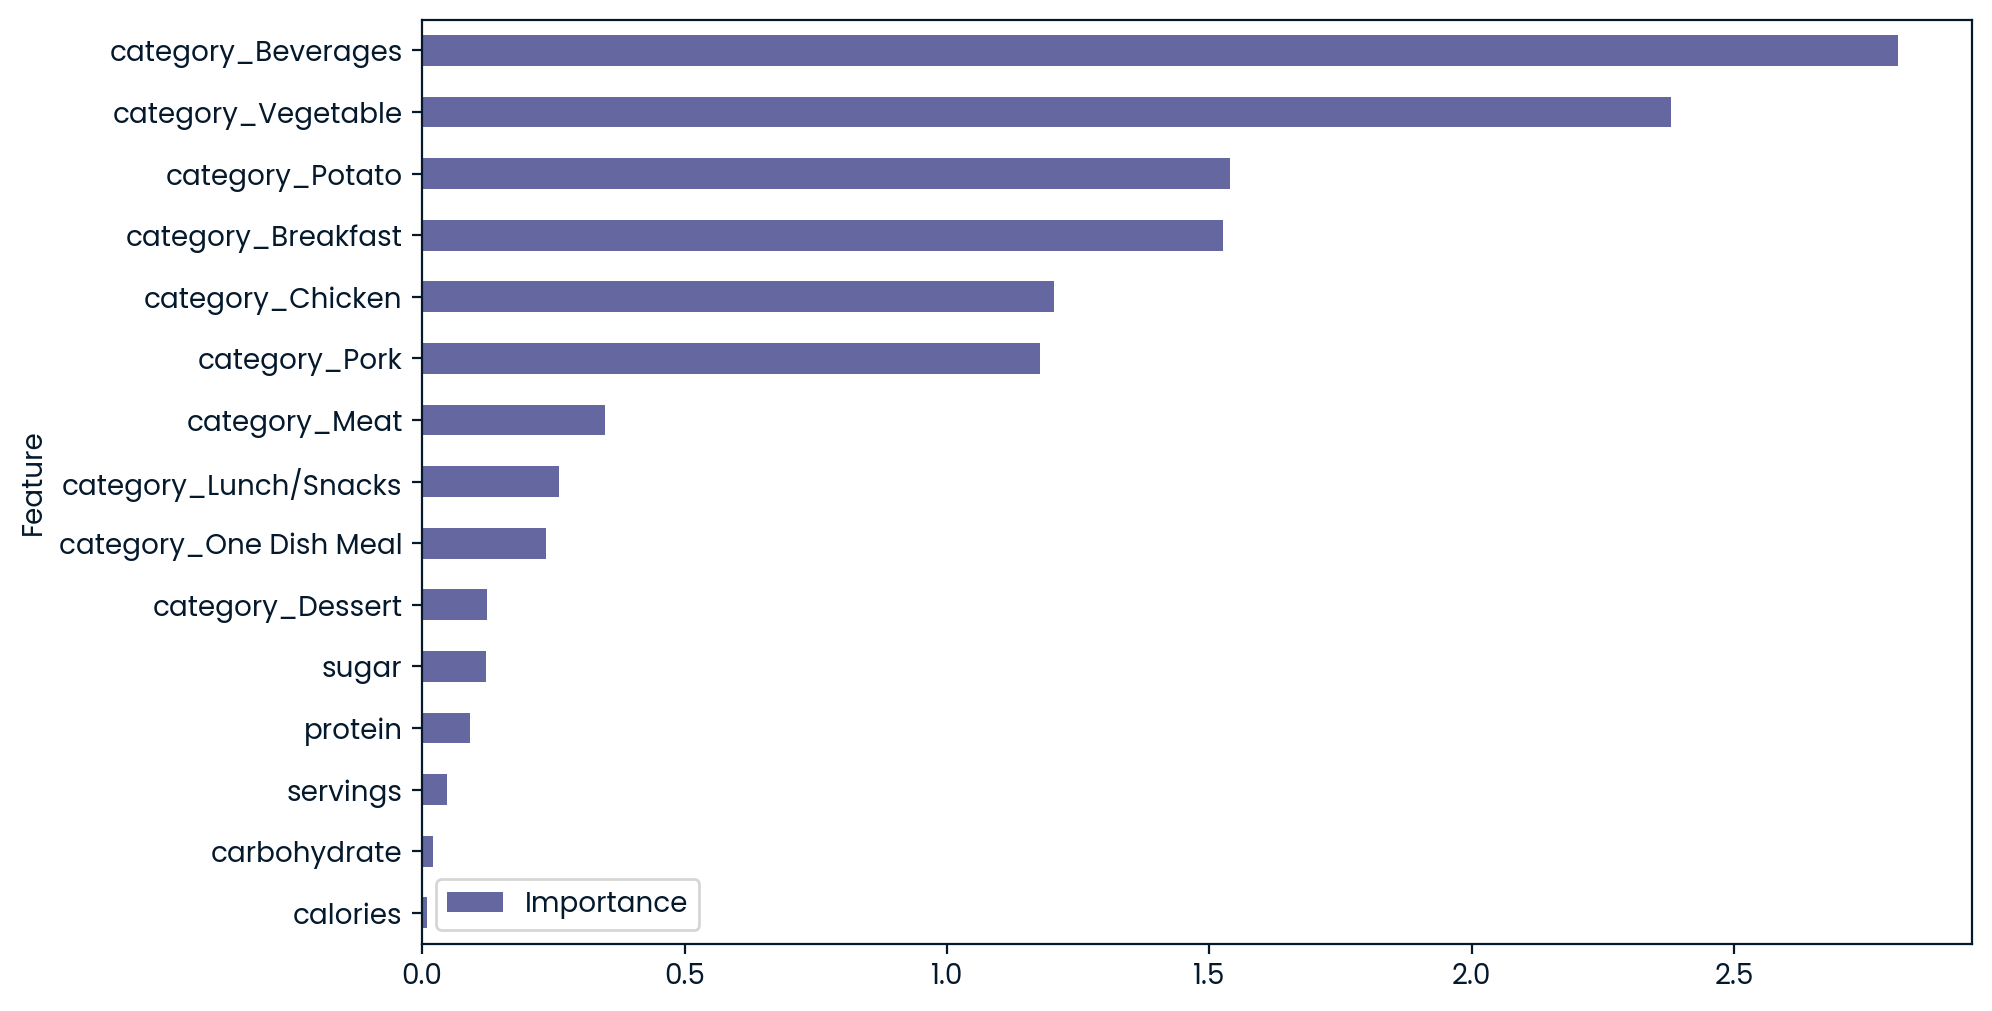

In [122]:
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Based on the current feature importance values shown in the plot, the business can estimate the initial baseline performance of the model.

# Business Goals
The business goals include the following;

1. **to predict which recipes will lead to high traffic**
2. **to correctly predict high traffic recipes 80% of the time**

- Based on the results performance of our two models, we clearly saw that our Logistic Regression model achieved a precision of 0.81 when predicting recipes which will lead to high traffic compared to a precision of 0.78 as obtained from our Random Forest Classifier model.
- Furthermore, we also noticed that, our Logistic Regression model performs well when it comes to obtaining a good balance between bias and variance as compared to our Random Forest Classifier which does not generalise so well with new or test data. 
- As a result, our Logistic Regression model therefore, meets the bussiness goals.


# Monitoring Metric, KPI and Recommendations
Based on the business goal, the **KPI (Key Performance Indicator)** or key metrics to monitor here, is the **precision** for the 'high_traffic' class. This metric represents the model's ability to correctly identify high traffic recipes, which is our primary objective.

**Recommendations**

 
When developing the recipe lineup, the business should consider the following:
- Emphasize recipes that combine the top feature categories, such as vegetable-based dishes with potatoes or chicken/pork.
- Experiment with new and innovative recipe ideas within these high-performing categories to keep the menu fresh and appealing.
- Closely monitor customer feedback and preferences to fine-tune the recipe offerings and align with evolving demands.
- Promote the high-performing recipe categories through targeted marketing and advertising to drive increased traffic.

**For the recipe categories that generate low traffic, the business should not necessarily stop offering those recipes entirely.Instead the following strategies could be considered:**

- Look for opportunities to optimize these recipes by adjusting ingredients, flavors, presentation, or other factors that could make them more appealing to customers.
- Rather than positioning the low-performing categories as primary menu items, we can consider using them as supplementary or supporting roles to recipes that generate high traffic.